In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Step 1 - Data Preparation

In [2]:
data = pd.read_csv("C:\\Users\\wrnaf\\OneDrive\\Desktop\\Transport Project\\Motor_Vechile_Data.csv")
data.head()

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25964\3334557915.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\wrnaf\\OneDrive\\Desktop\\Transport Project\\Motor_Vechile_Data.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
desc_stats = data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.921975e+06,1.921975e+06,2.161715e+06,2.161702e+06,2.161733e+06,2.161733e+06,2.161733e+06,2.161733e+06,2.161733e+06,2.161733e+06,2.161733e+06
mean,4.061431e+01,-7.372778e+01,3.209813e-01,1.551093e-03,5.854655e-02,7.679024e-04,2.799976e-02,1.216616e-04,2.301663e-01,6.332882e-04,3.223327e+06
std,2.111809e+00,3.948723e+00,7.089851e-01,4.153794e-02,2.479861e-01,2.826251e-02,1.670979e-01,1.107123e-02,6.701752e-01,2.751113e-02,1.507525e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066748e+01,-7.397465e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.176553e+06
50%,4.072046e+01,-7.392699e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.717137e+06
75%,4.076962e+01,-7.386671e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.257798e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.798529e+06


## Step 2 - Pre-Processing and Exploration

In [4]:
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data.sort_values(by='Percentage (%)', ascending=False)

,Missing Values,Percentage (%)
VEHICLE TYPE CODE 5,2152340,99.565488
CONTRIBUTING FACTOR VEHICLE 5,2152040,99.551610
VEHICLE TYPE CODE 4,2127510,98.416872
CONTRIBUTING FACTOR VEHICLE 4,2126232,98.357753
VEHICLE TYPE CODE 3,2011733,93.061123
CONTRIBUTING FACTOR VEHICLE 3,2005827,92.787916
OFF STREET NAME,1788624,82.740283
CROSS STREET NAME,824611,38.145830
ZIP CODE,668957,30.945404
BOROUGH,668688,30.932960


C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25964\2951777242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


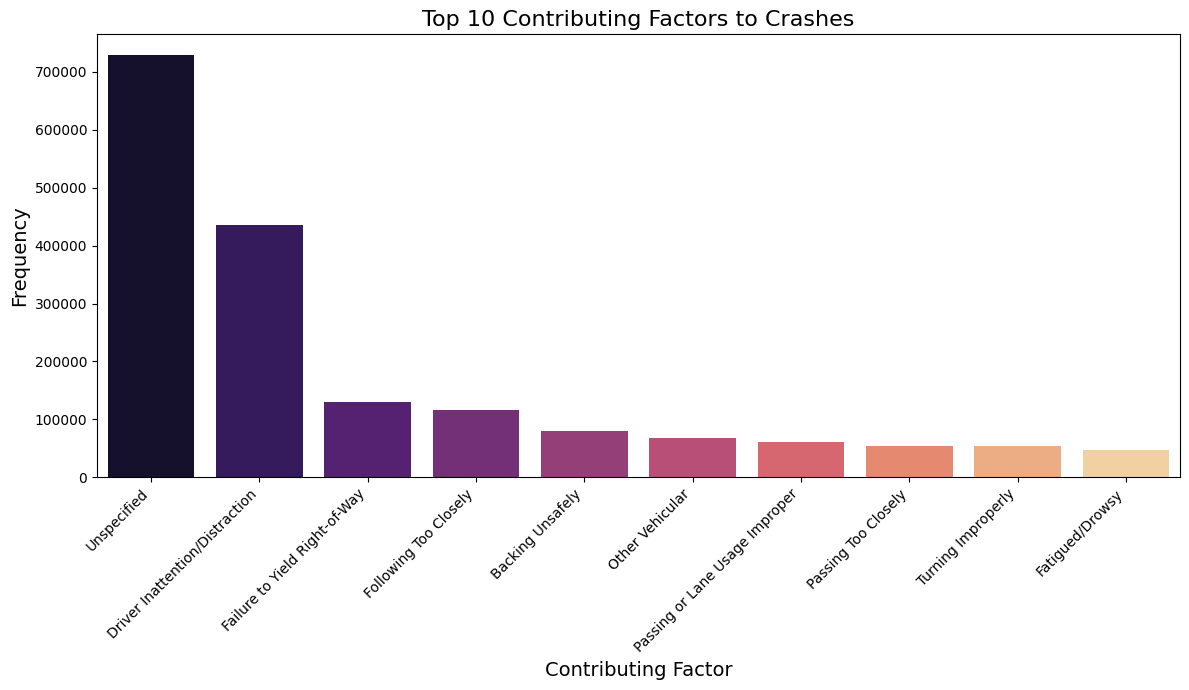

In [5]:
top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to Crashes', fontsize=16)
plt.xlabel('Contributing Factor', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can see the main reason is being distracted, whether that means talking to someone, eating, on your phone, etc. Failure to yield and following to closely can be dependent on the level of attention people are paying. So the main this is eyes on the road and be attentive of your surroundings.

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25964\662343541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


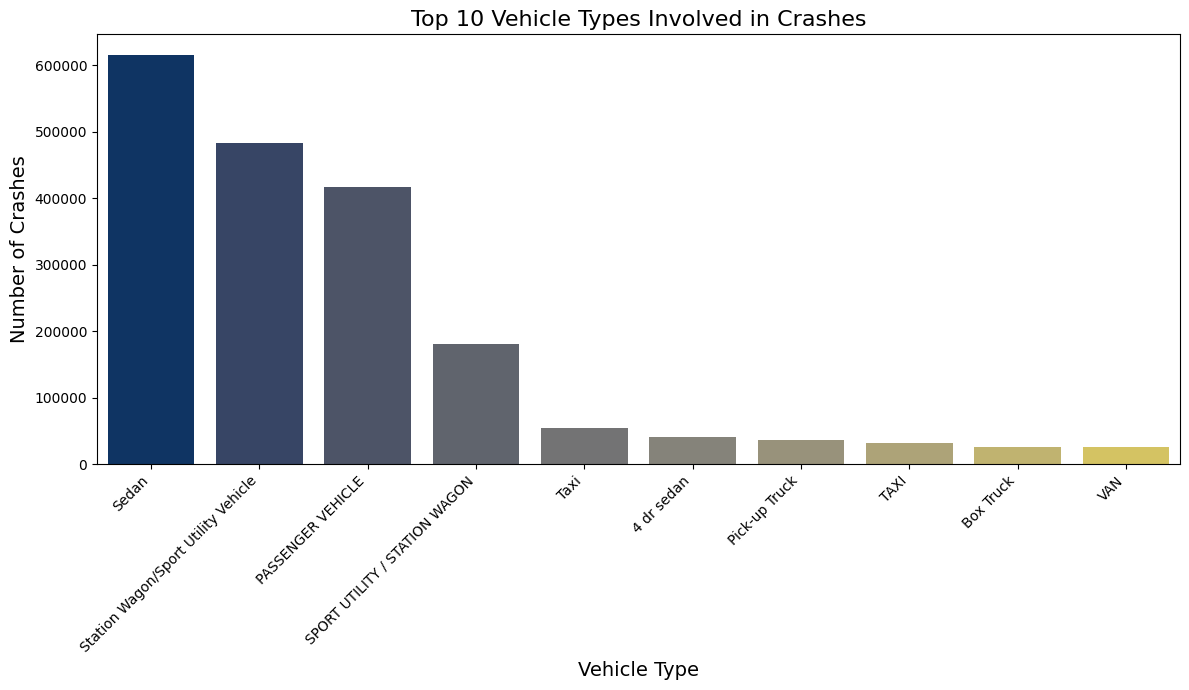

In [6]:
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in Crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The main an obvious reason why sedan, station wagons, and passenger vechiles are involved in the most crashes is because they are the most common kinds of cars present on the road. The more the car appears on the road the more likely it is to be involved in an accident. We also see how much lower trucks and taxis are. This can be explained because these vechiles aren't as common, but also by the demographic of who is driving them. Trucks and taxis are more likely to be driven my older people with more experience or by people driving for work. The top three cars are some of the most common cars for young inexperienced drivers.


C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25964\214134747.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")


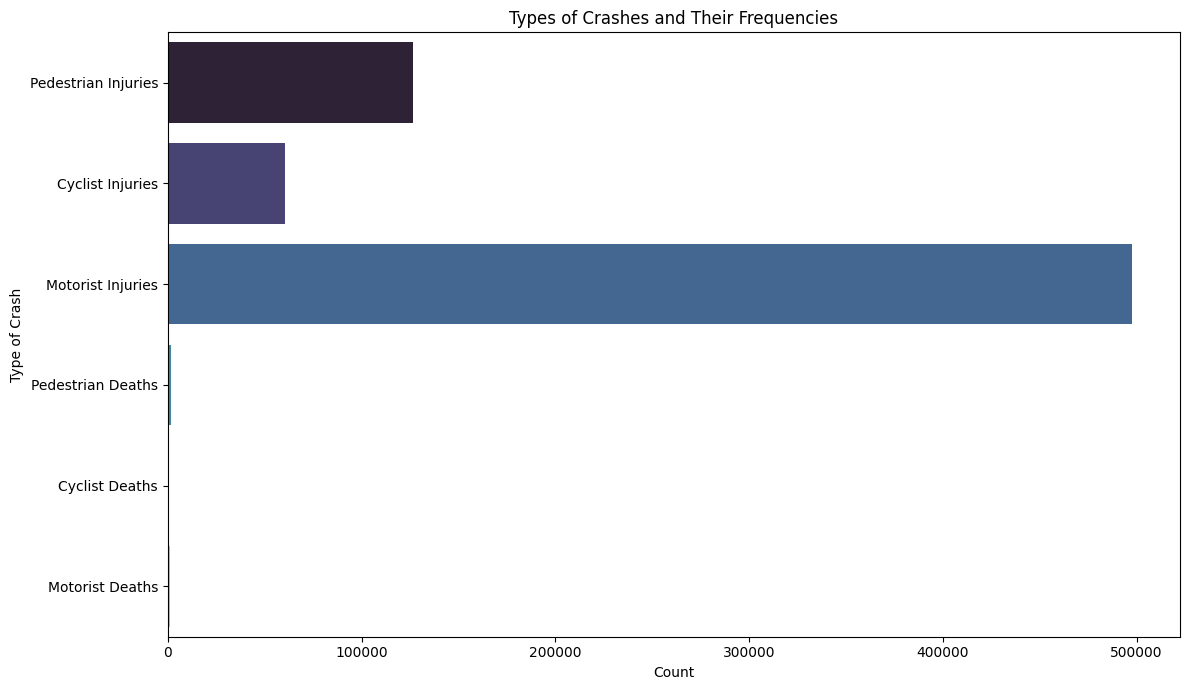

In [7]:

types_of_crashes = {
    'Pedestrian Injuries': data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclist Injuries': data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorist Injuries': data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths': data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclist Deaths': data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorist Deaths': data['NUMBER OF MOTORIST KILLED'].sum()
}

crash_types_df = pd.DataFrame(list(types_of_crashes.items()), columns=['Crash Type', 'Count'])

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Crash Type', data=crash_types_df, palette="mako")
plt.title('Types of Crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of Crash')
plt.tight_layout()
plt.show()

Based off of this data I would recommend safer infastructure for pedestrians. It is expected that motorists are going to have the highest amount of injuries because ever accident involves a motorist. But looking closer at the data we see the pedestrian deaths in the highest. This is likely because when pedestrians are hit, they do not have a car acting as a protective cage. There should however be more protection from the infatructure such as rails, cement barriers, and dividers.

## Step 3 - Time Series Anaylsis

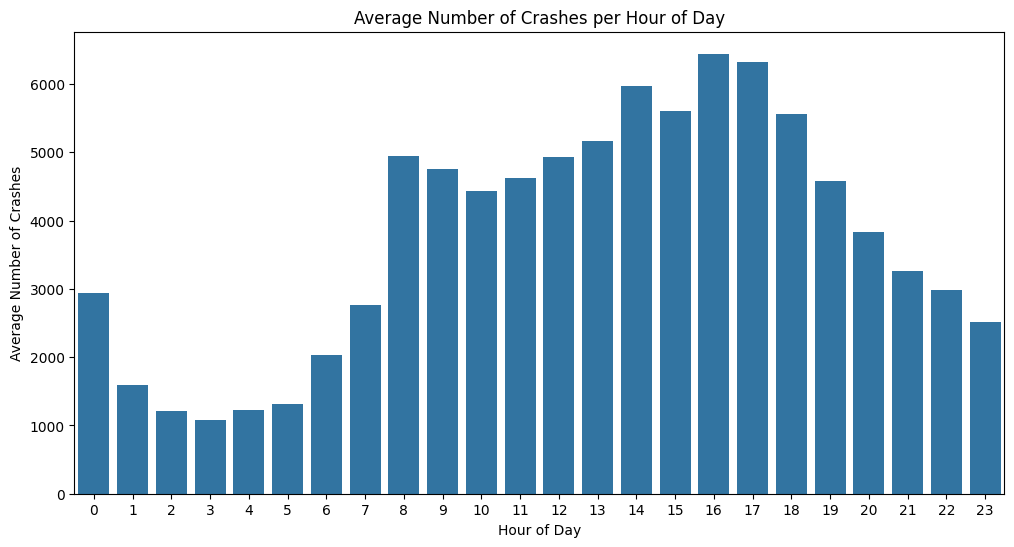

In [8]:

data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M')

data['Hour of Day'] = data['CRASH TIME'].dt.hour

average_crashes_per_hour = data.groupby('Hour of Day').size() / data['Hour of Day'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_crashes_per_hour.index, y=average_crashes_per_hour.values)
plt.title('Average Number of Crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Crashes')
plt.xticks(range(0, 24))
plt.show()


Hours 16-17 have the highest number of crashes. This is likely because of the influx of traffic due to rush-hour. Not only are the roads more full, but people are tired and antsy after getting off a full day of work.
tired and antsy after getting off a full day of work.


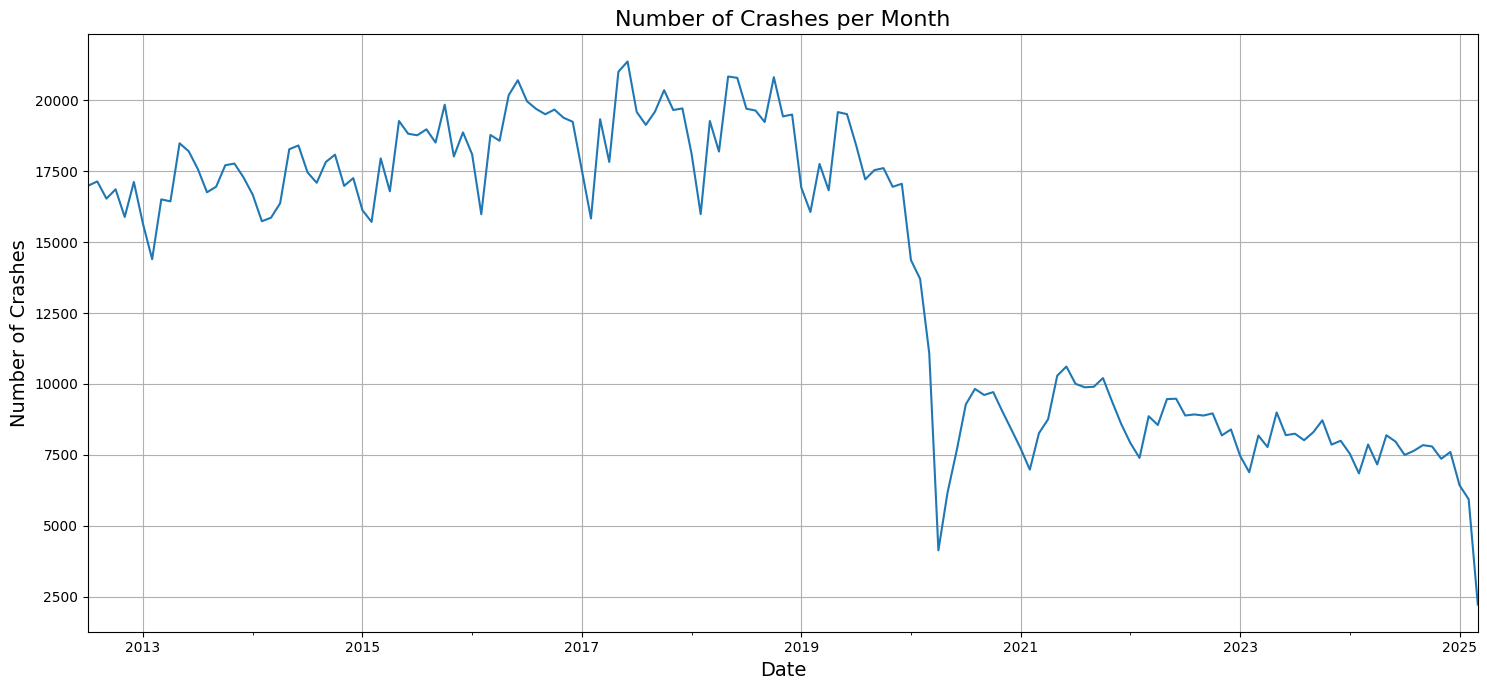

In [9]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

plt.figure(figsize=(15, 7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Covid caused the ammount of crashes to crash by over 50%. This is due to everyone staying inside instead of being on the roads during the intial quarantine phase.


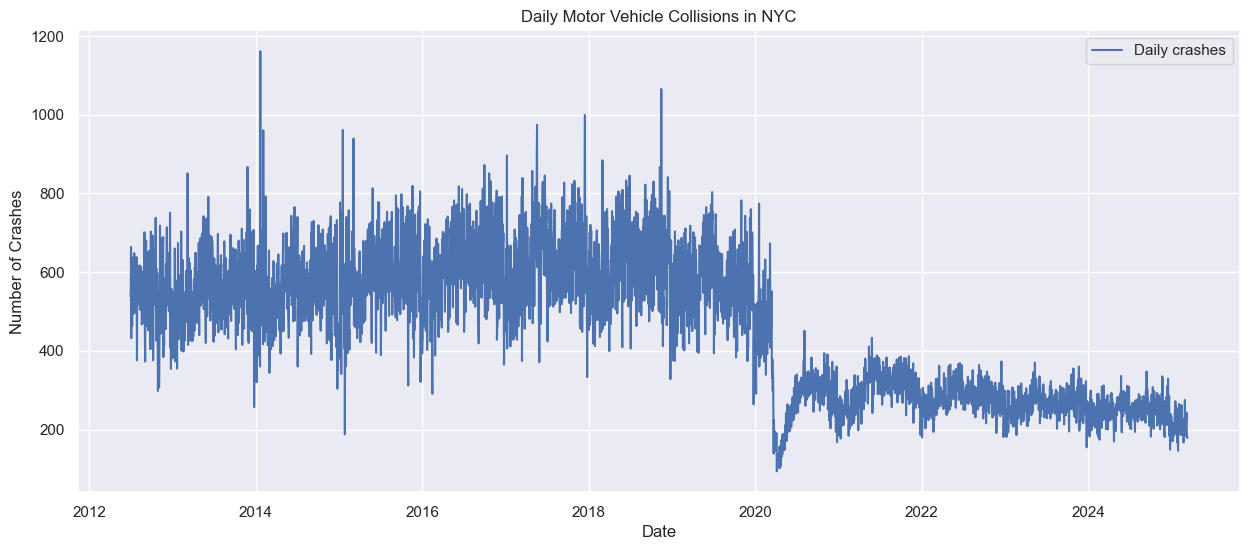

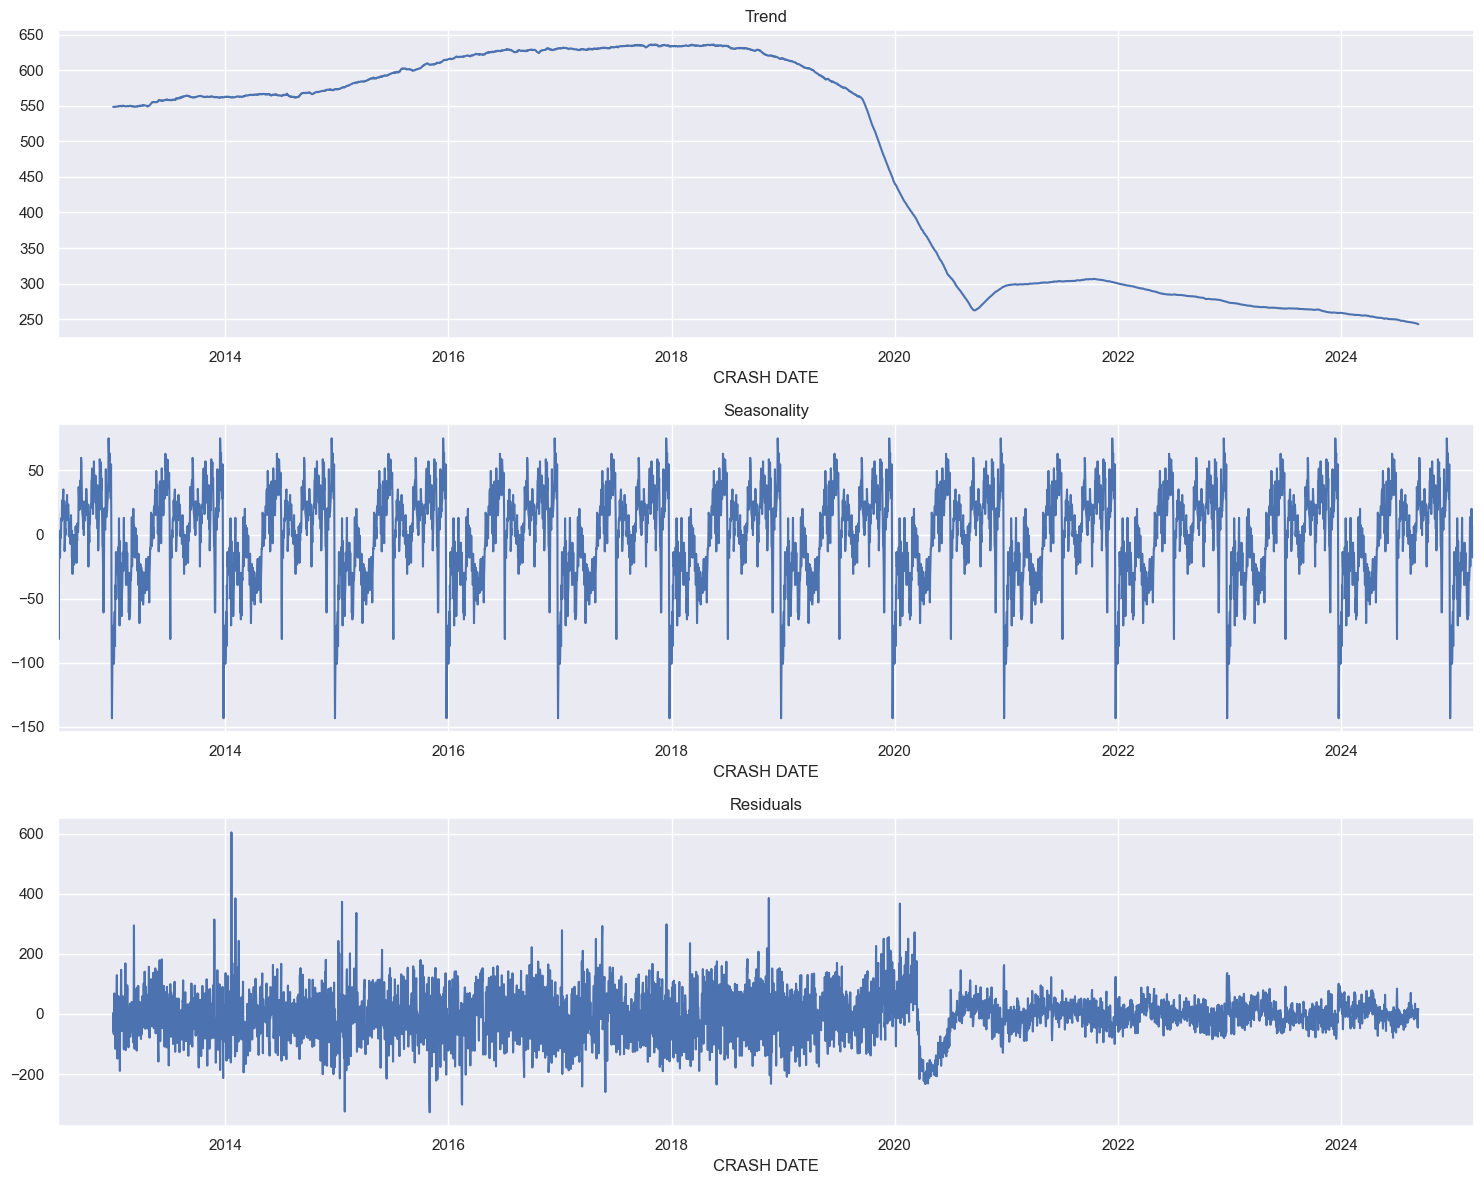

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_crashes = data.groupby('CRASH DATE').size()

sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))
plt.plot(daily_crashes.index, daily_crashes.values, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()

decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

Trend: Initially there is a gradual increase in the number of crashes from 2014 - 2020, but once covid hits (2020-2022) you can see the very harsh decline. As addressed above covid caused people to be in quarantine and not on the roads.

Residuals: Again the signigicant fluxuation in the residuals graph is around 2020 - 2022. This is another cause of covid-19 and the national quarantine.

## Step 4 - Geospatial Analysis

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_25964\2184212468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


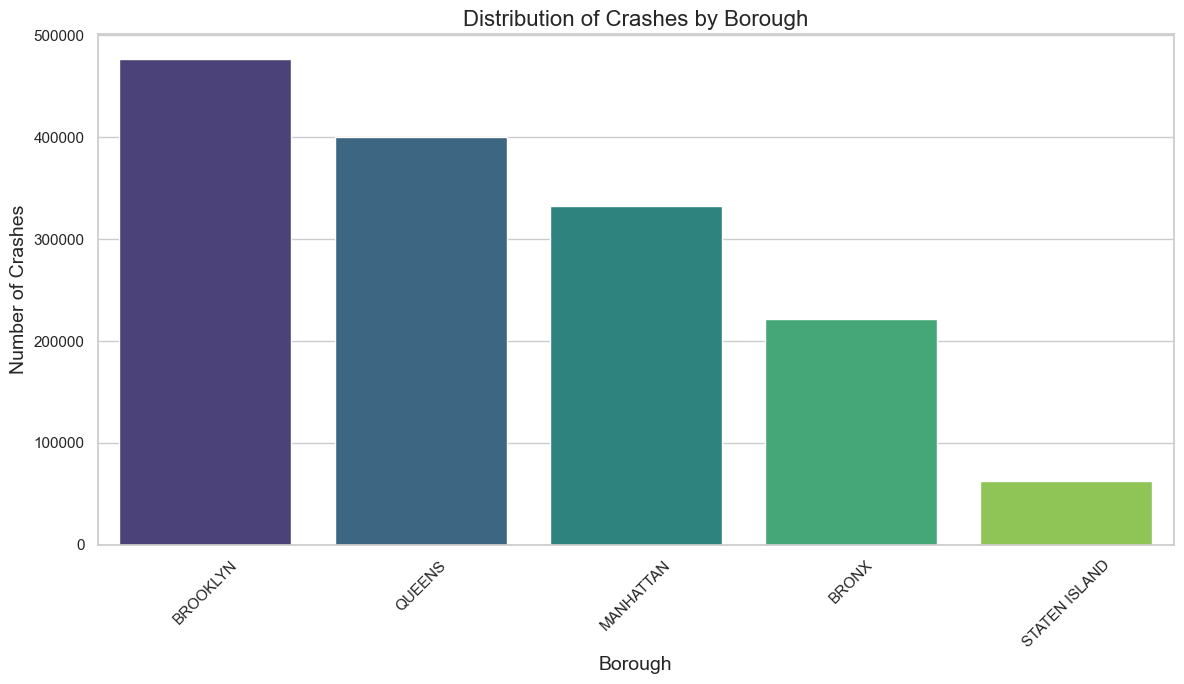

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explainations: Some factors that explain this distribution include population density and road infastructure. Brooklyn is in the heart of New York meaning not only is the population going to be more dense, but the roads are going to be more complex with more 4 way stops and lanes of traffic. Staten Island is a separate entity from the main land of new york. Because of this, it is less populated with traffic and people. The roads are also more likly to be residental or highway formart as compared to the inner city streets of Brooklyn.

In [12]:
from folium.plugins import HeatMap
from IPython.display import display

data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])

heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]

m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

HeatMap(heat_data, radius=5, max_zoom=13).add_to(m)


m.save("Heatmap.html")

In [13]:

sample_data_severity = data_geo.sample(n=1000, random_state=42)

m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = "red"  

        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=3,
          radius=5,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = "orange"
        folium.CircleMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          radius=5,
          color=color,
          fill=True,
          fill_color=color
       ).add_to(m_severity)

    else:
        color = "green" 
        folium.features.RegularPolygonMarker(
          location=[row['LATITUDE'], row['LONGITUDE']],
          number_of_sides=4, 
          radius=5,
          color=color,
          fill=True,
          fill_color=color
        ).add_to(m_severity)

m_severity.save("severity.html")


## Step 5 - Self-Guided Research Question

### Research Question:


#### How do income levels, population size, education rates, and employment rates influence motor vehicle crash rates in New York City by borough in 2023?


In [14]:
data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'Hour of Day'],
      dtype='object')

In [15]:
data['BOROUGH'].value_counts()


BOROUGH
BROOKLYN         476903
QUEENS           400442
MANHATTAN        331958
BRONX            221118
STATEN ISLAND     62624
Name: count, dtype: int64

In [16]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
yearly_counts = data['CRASH DATE'].dt.year.value_counts().sort_index(ascending=False)
print(yearly_counts)



CRASH DATE
2025     14575
2024     91279
2023     96605
2022    103886
2021    110557
2020    112916
2019    211486
2018    231564
2017    231007
2016    229831
2015    217695
2014    206045
2013    203742
2012    100545
Name: count, dtype: int64


I tried to web scrape and download data from the census bureau, but the information needed, would require downloading hundrends of datasets and sorting through and dropping most of the data because it is not relevant to the research question. So instead I will be manually inputting relevant data into a pandas dataframe.

In [17]:
Borough_data = {
    'Borough' : ['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
    'Median Income': [76912, 101078, 46838, 81929, 95543],
    'Population': [2561225, 1597451, 1419250, 2330124, 	492734],
    'Education Percent': [43.5/100, 64.9/100, 23.5/100, 36.6/100, 35.5/100],
    'Employment Rate': [61.1/100, 63.0/100, 53.8/100, 60.4/100, 56.7/100],
}
    

In [18]:
Borough_df = pd.DataFrame(Borough_data)
Borough_df.head()

,Borough,Median Income,Population,Education Percent,Employment Rate
0,BROOKLYN,76912,2561225,0.435,0.611
1,MANHATTAN,101078,1597451,0.649,0.630
2,BRONX,46838,1419250,0.235,0.538
3,QUEENS,81929,2330124,0.366,0.604
4,STATEN ISLAND,95543,492734,0.355,0.567


In [19]:
data_2023 = data[data['CRASH DATE'].dt.year == 2023]
data_2023.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Hour of Day
2,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,1
5,2023-04-26,1900-01-01 13:30:00,NaN,NaN,NaN,NaN,NaN,WEST 54 STREET,NaN,NaN,...,NaN,NaN,NaN,4623759,Sedan,Box Truck,NaN,NaN,NaN,13
6,2023-11-01,1900-01-01 07:12:00,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,4675709,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,7
7,2023-11-01,1900-01-01 08:01:00,NaN,NaN,NaN,NaN,NaN,WEST 35 STREET,HENRY HUDSON RIVER,NaN,...,NaN,NaN,NaN,4675769,Sedan,NaN,NaN,NaN,NaN,8
8,2023-04-26,1900-01-01 22:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 Ed Koch queensborough bridge,...,NaN,NaN,NaN,4623865,Sedan,Pick-up Truck,NaN,NaN,NaN,22


In [20]:
borough_crash_counts = data_2023['BOROUGH'].value_counts()
borough_crash_counts

BOROUGH
BROOKLYN         22891
QUEENS           17786
MANHATTAN        11821
BRONX            10505
STATEN ISLAND     2724
Name: count, dtype: int64

In [21]:
Borough_df['Crash Count'] = Borough_df['Borough'].map(borough_crash_counts)

Borough_df


,Borough,Median Income,Population,Education Percent,Employment Rate,Crash Count
0,BROOKLYN,76912,2561225,0.435,0.611,22891
1,MANHATTAN,101078,1597451,0.649,0.630,11821
2,BRONX,46838,1419250,0.235,0.538,10505
3,QUEENS,81929,2330124,0.366,0.604,17786
4,STATEN ISLAND,95543,492734,0.355,0.567,2724


In [22]:
Borough_df['Crash Rate per 1000'] = (Borough_df['Crash Count'] / Borough_df['Population']) * 1000
Borough_df

,Borough,Median Income,Population,Education Percent,Employment Rate,Crash Count,Crash Rate per 1000
0,BROOKLYN,76912,2561225,0.435,0.611,22891,8.937520
1,MANHATTAN,101078,1597451,0.649,0.630,11821,7.399914
2,BRONX,46838,1419250,0.235,0.538,10505,7.401797
3,QUEENS,81929,2330124,0.366,0.604,17786,7.633070
4,STATEN ISLAND,95543,492734,0.355,0.567,2724,5.528338


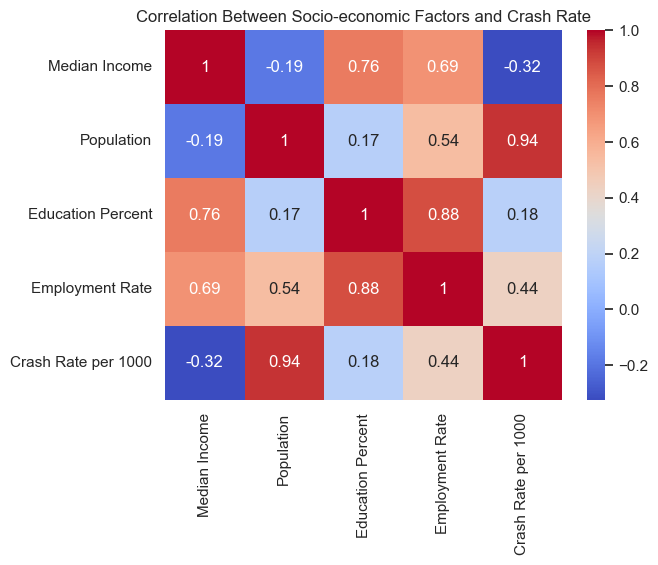

In [23]:
corr_matrix = Borough_df[['Median Income', 'Population', 'Education Percent', 'Employment Rate', 'Crash Rate per 1000']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Socio-economic Factors and Crash Rate")
plt.show()

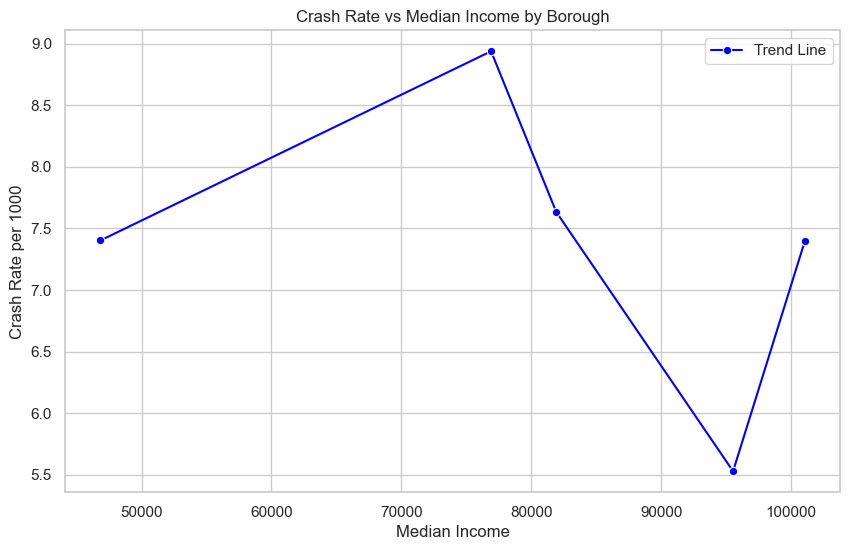

In [24]:
# Crash Rate vs. Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Borough_df, x='Median Income', y='Crash Rate per 1000')
plt.title('Crash Rate vs Median Income by Borough')
sns.lineplot(data=Borough_df, x='Median Income', y='Crash Rate per 1000', marker="o", linestyle="-", color="blue", label="Trend Line")
plt.xlabel('Median Income')
plt.ylabel('Crash Rate per 1000')
plt.show()


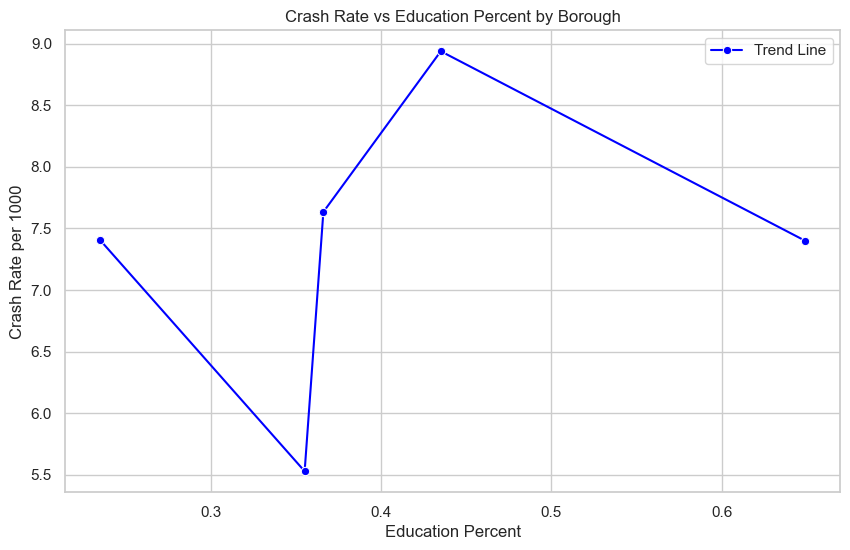

In [25]:

# Crash Rate vs. Education Percent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Borough_df, x='Education Percent', y='Crash Rate per 1000')
plt.title('Crash Rate vs Education Percent by Borough')
sns.lineplot(data=Borough_df, x='Education Percent', y='Crash Rate per 1000', marker="o", linestyle="-", color="blue", label="Trend Line")

plt.xlabel('Education Percent')
plt.ylabel('Crash Rate per 1000')
plt.show()

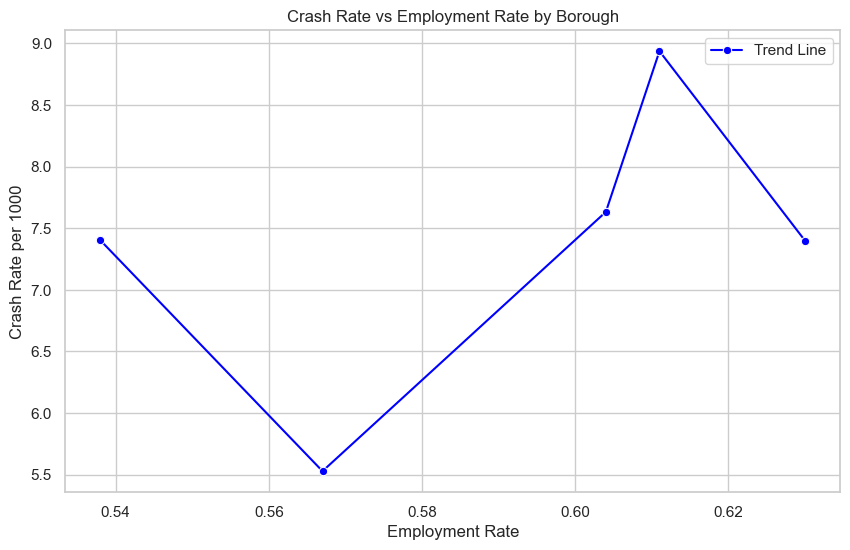

In [26]:

# Crash Rate vs. Employment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Borough_df, x='Employment Rate', y='Crash Rate per 1000')
plt.title('Crash Rate vs Employment Rate by Borough')
sns.lineplot(data=Borough_df, x='Employment Rate', y='Crash Rate per 1000', marker="o", linestyle="-", color="blue", label="Trend Line")
plt.xlabel('Employment Rate')
plt.ylabel('Crash Rate per 1000')
plt.show()

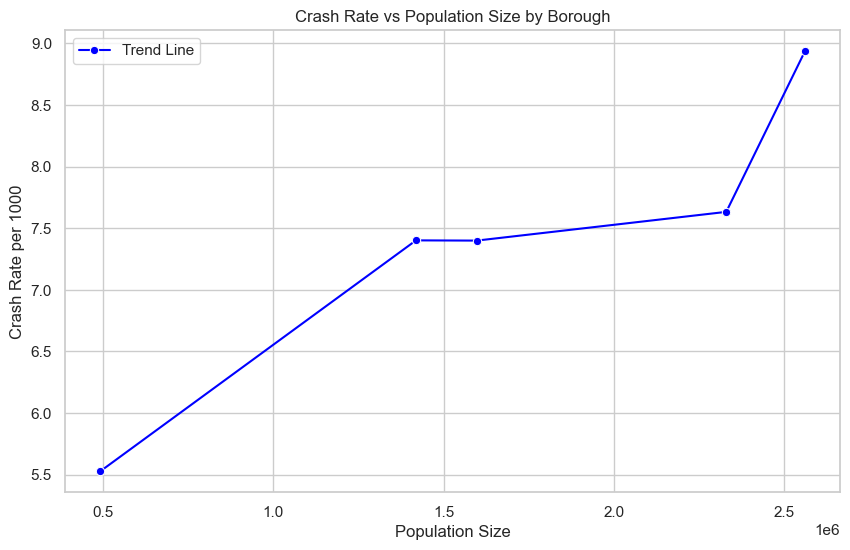

In [27]:
# Crash Rate vs. Population Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Borough_df, x='Population', y='Crash Rate per 1000')
plt.title('Crash Rate vs Population Size by Borough')
sns.lineplot(data=Borough_df, x='Population', y='Crash Rate per 1000', marker="o", linestyle="-", color="blue", label="Trend Line")
plt.xlabel('Population Size')
plt.ylabel('Crash Rate per 1000')
plt.show()

## Anaylsis

Looking at the correlation matrix first we can identify that the 'Crash Rate per 1000' has a strong postivie correlation with population and a moderate positive correlation with employment rate. We can also see there is a moderate negative correlation with Median Income. There is also a very slight correlation between education rate and crashes per 1000, but this can be exained due to the .88 correlation between eduation and employment rate. Looking at the graphs we can see a similarly mirrored correlation. Starting with the income graph we can see a slight incline but then it quickly declines. The Education graph starts by declining and then shoots up on an upward trend as it increases. Employment rate starts by declining then moving steadily up like education percent. Finally, population size is a constant strong upward trend.

## Conclusion

### 1. Population
Based on the imformation above, population is the largest predictor of crashes. This is due to a couple reasons:

- More people means more cars on the road, leading to more congested roadways and traffic

- There is a larger population of pedestrians and cyclists, contributing to factors that cause collisons.

- Larger populations also have more maintence and complexitiy in their transportation infustructure, which can make navigting it more difficult, but also making sure everything is up to date and working more difficult.

### 2. Employment Rate
Employment directly contributes to crashes simply because of commuting:

- Higher employment rates mean more people are not only commuting and using the roads, but at the same high traffic times (rush hour).
  
- High employment means there is much more diversity in the ways people get to work (driving, train, walking, etc.) all these different forms of transportation have to coexist and work, which can be a complicated task.

### 3. Median Income
For income we know as education decreases the amount of crashes increase.

- People with greater income are more likely to live in wealthier neighborhoods/boroughs. Because of this the road conditions are more likely to be well kept and up to date.

- Wealthier communities are also more likely to to have more options for transportation that are well conntected with the city.

- Wealthier drivers are more likely to own newer and safer vechiles with the new top of the line driving features.

### Education Levels
Education does not seem to have a direct correlation with crashes, but it indirectly affects other factors.

- Education has a strong correlation with employment as well as income. We know from out data income has a negatice correlation and employmeny has a positive correlation with crashes. The correlation is slightly stronger for employment, which would explain this small positive correlation with crashes.
